# Let's try the process of L* algorithm (Angluin) by hand
## What's this?
An implementation of Angluin's automata learning method based on the following paper:
```
Dana Angluin, Learning regular sets from queries and counterexamples, Information and Computation, Volume 75, Issue 2, 1987, Pages 87-106, ISSN 0890-5401, https://doi.org/10.1016/0890-5401(87)90052-6. (http://www.sciencedirect.com/science/article/pii/0890540187900526)
```

This notebook is maintained in https://github.com/ashiato45/angluin-automata-learning

## Usage
1. Think of a regular language $L$ over alphabet $\Sigma=\{0,1\}$ in your head.
2. Run this notebook.
3. Two kind of queries are made by the notebook:
  - Membership-query: If the word $w$ given by this query is in your $L$, type $1$.  If not type $0$.
  - Equivalence-query: If the automaton $A$ given by this query yields the same language as your $L$, just hit Enter.  If not, type a word in the difference between $L_A$ and your $L$.
4. You will get a minimal automaton $A$ such that $L_A=L$.

## Expression of automata
The state with the symbol $S$ is initial state.  Ones with the symbol $A$ are accepting states.

In [1]:
import graphviz
from graphviz import *

In [2]:
import functools
@functools.lru_cache(None)
def teacher_hand(s):
    x = input(f"Membership-query.  '{s}'?: ")
    return x

In [3]:
import angluin

In [4]:
l = angluin.Learner(teacher_hand)
# l = angluin.Learner(angluin.teacher_even)
l.rows = [""]
l.columns = [""]
l.table = l.make_table(l.rows, l.columns)

Membership-query.  ''?: 0


Membership-query.  'a'?: 1
Membership-query.  'b'?: 0
Membership-query.  'aa'?: 2
Membership-query.  'ab'?: 1
Membership-query.  'aaa'?: 0
Membership-query.  'aab'?: 2


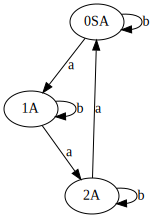

Equivalence-query.  Type empty if it is correct.  If not, give me a counterexample: 
Completed


In [5]:
while True:
    while not l.update():
        pass
    display(l.draw())
#     display(l.draw())
    ce = input("Equivalence-query.  Type empty if it is correct.  If not, give me a counterexample: ")
    if ce == "":
        break
    else:
        for i in range(len(ce) + 1):
            h = ce[:i]
            if not (h in l.rows):
                l.rows.append(h)
        l.table = l.make_table(l.rows, l.columns)
print("Completed")